# Evaluation and Telemetry Testing Notebook

This notebook provides comprehensive testing for evaluation metrics and telemetry logging systems.

## Features
- Evaluation metrics testing (precision, recall, accuracy, F1-score)
- Telemetry logging system testing
- Delta table creation and management
- User interaction simulation
- Performance benchmarking
- Data visualization and analysis


## Setup and Configuration


In [1]:
# Import required libraries
import os
import sys
from pathlib import Path
import time
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
from typing import List, Dict, Any

# Add src to path for imports
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))


# Import our modules
from src.utils.config import config_manager
from src.evaluation import (
    EvaluationMetrics, 
    TelemetryLogger, 
    SessionTracker, 
    DeltaTableManager,
    UserInteraction,
    InteractionType,
    EventType
)

print("✅ Setup complete!")


✅ Setup complete!


## Delta Tables Setup


In [2]:
# Initialize Delta table manager
print("🏗️ Setting up Delta tables for telemetry...")

delta_manager = DeltaTableManager()

# Check if we're using Databricks
if config_manager.data.use_databricks:
    print("📊 Creating Delta tables in Unity Catalog...")
    try:
        delta_manager.create_telemetry_tables()
        print("✅ Delta tables created successfully")
        
        # Display table information
        tables = [
            "user_interactions",
            "sessions", 
            "conversations",
            "turns",
            "evaluation_results",
            "performance_metrics"
        ]
        
        print("\n📋 Table Information:")
        for table in tables:
            info = delta_manager.get_table_info(table)
            if "error" not in info:
                print(f"  {table}: {info['row_count']} rows, {len(info['schema'])} columns")
            else:
                print(f"  {table}: Error - {info['error']}")
                
    except Exception as e:
        print(f"❌ Error creating Delta tables: {e}")
        print("Make sure you have proper Databricks configuration and permissions")
else:
    print("⏭️ Skipping Delta table creation (Local mode enabled)")
    print("Note: Telemetry data will be logged to console only")


🏗️ Setting up Delta tables for telemetry...
⏭️ Skipping Delta table creation (Local mode enabled)
Note: Telemetry data will be logged to console only


## Evaluation Metrics Testing


In [3]:
# Initialize evaluation metrics
print("🧪 Testing evaluation metrics...")

metrics = EvaluationMetrics()

# Create test cases for evaluation
test_cases = [
    {
        "query": "What is the project charter about?",
        "expected_answer": "The project charter defines the vision for a production-ready multi-agent AI system using Databricks and Unity Catalog.",
        "actual_answer": "The project charter outlines a multi-agent AI system built on Databricks with Unity Catalog for data governance.",
        "retrieved_docs": [
            "The project charter defines the vision for a production-ready multi-agent AI system.",
            "The system uses Databricks and Unity Catalog for data management.",
            "The architecture includes four layers: Data Foundation, Tooling, Intelligence, and Foundational LLM."
        ],
        "relevant_docs": [
            "The project charter defines the vision for a production-ready multi-agent AI system.",
            "The system uses Databricks and Unity Catalog for data management."
        ],
        "response_time": 2.5
    },
    {
        "query": "What technology stack is used?",
        "expected_answer": "The technology stack includes Databricks, Unity Catalog, Delta Lake, Spark GraphX, and OpenAI Assistants API.",
        "actual_answer": "The stack uses Databricks for compute, Unity Catalog for governance, Delta Lake for storage, and OpenAI for AI models.",
        "retrieved_docs": [
            "Databricks provides the compute platform for the system.",
            "Unity Catalog manages data governance and access control.",
            "Delta Lake provides ACID transactions and versioning.",
            "Spark GraphX is used for graph processing."
        ],
        "relevant_docs": [
            "Databricks provides the compute platform for the system.",
            "Unity Catalog manages data governance and access control.",
            "Delta Lake provides ACID transactions and versioning."
        ],
        "response_time": 1.8
    }
]

print(f"📋 Created {len(test_cases)} test cases for evaluation")

# Run evaluation
results_df = metrics.batch_evaluate(test_cases)

print("\n📊 Evaluation Results:")
print(results_df[['query', 'precision', 'recall', 'accuracy', 'f1_score', 'semantic_similarity', 'answer_quality_score']].round(3))

# Calculate summary metrics
summary_metrics = metrics.calculate_summary_metrics(results_df)
print(f"\n📈 Summary Metrics:")
for metric, value in summary_metrics.items():
    if isinstance(value, float):
        print(f"  {metric}: {value:.3f}")
    else:
        print(f"  {metric}: {value}")


🧪 Testing evaluation metrics...
📋 Created 2 test cases for evaluation

📊 Evaluation Results:
                                query  precision  recall  accuracy  f1_score  \
0  What is the project charter about?      0.667     1.0       1.0     0.800   
1      What technology stack is used?      0.750     1.0       1.0     0.857   

   semantic_similarity  answer_quality_score  
0                0.474                 0.683  
1                0.371                 0.629  

📈 Summary Metrics:
  avg_precision: 0.708
  avg_recall: 1.000
  avg_accuracy: 1.000
  avg_f1_score: 0.829
  avg_semantic_similarity: 0.423
  avg_answer_quality: 0.656
  avg_response_time: 2.150
  total_queries: 2
  successful_queries: 2


## Telemetry Logging Testing


In [4]:
# Initialize telemetry logger and session tracker
print("📊 Testing telemetry logging system...")

telemetry_logger = TelemetryLogger()
session_tracker = SessionTracker()

# Simulate a user session
print("🎭 Simulating user session...")

# Start session
session_id = session_tracker.start_session(user_id="test_user_123")
print(f"✅ Started session: {session_id}")

# Start conversation
conversation_id = session_tracker.start_conversation(session_id)
print(f"✅ Started conversation: {conversation_id}")

# Start turn
turn_id = session_tracker.start_turn(conversation_id)
print(f"✅ Started turn: {turn_id}")

# Simulate user interactions
print("\n🖱️ Simulating user interactions...")

# Log query
query = "What is the project architecture?"
telemetry_logger.log_query(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    query=query,
    user_id="test_user_123",
    metadata={"source": "notebook_test"}
)

# Simulate response time
time.sleep(0.1)  # Simulate processing time

# Log response
response = "The architecture consists of four layers: Data Foundation, Tooling & Integration, Intelligence & Reasoning, and Foundational LLM."
response_time = 2.3
telemetry_logger.log_response(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    response=response,
    response_time=response_time,
    user_id="test_user_123",
    metadata={"model": "llama-3.1", "temperature": 0.2}
)

# Simulate user interactions
telemetry_logger.log_click(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    element="copy_button",
    position={"x": 100, "y": 200},
    user_id="test_user_123"
)

telemetry_logger.log_copy(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    copied_text="Data Foundation, Tooling & Integration",
    source_element="response_text",
    user_id="test_user_123"
)

telemetry_logger.log_scroll(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    scroll_depth=0.75,
    scroll_direction="down",
    user_id="test_user_123"
)

telemetry_logger.log_dwell_time(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    element="response_text",
    dwell_time=5.2,
    user_id="test_user_123"
)

# Log performance metrics
telemetry_logger.log_performance_metric(
    session_id=session_id,
    conversation_id=conversation_id,
    turn_id=turn_id,
    metric_name="response_time",
    metric_value=response_time,
    user_id="test_user_123",
    metadata={"unit": "seconds"}
)

# End turn
turn_data = session_tracker.end_turn(turn_id)
print(f"✅ Ended turn: {turn_id}")

# End conversation
conversation_data = session_tracker.end_conversation(conversation_id)
print(f"✅ Ended conversation: {conversation_id}")

# End session
session_data = session_tracker.end_session(session_id)
print(f"✅ Ended session: {session_id}")

print(f"\n📊 Session Summary:")
print(f"  Duration: {session_data['duration']:.2f} seconds")
print(f"  Interactions: {session_data['interaction_count']}")

print(f"\n📊 Conversation Summary:")
print(f"  Duration: {conversation_data['duration']:.2f} seconds")
print(f"  Turns: {conversation_data['turn_count']}")

print(f"\n📊 Turn Summary:")
print(f"  Duration: {turn_data['duration']:.2f} seconds")

# Flush telemetry data
telemetry_logger.flush()
print("✅ Telemetry data flushed")


📊 Testing telemetry logging system...
🎭 Simulating user session...
✅ Started session: 4b697298-38de-4098-96f3-74b30b02dc5d
✅ Started conversation: bdc10ce5-9667-470e-96ed-9f610a7b7da6
✅ Started turn: 9ca46440-37db-404c-8e21-a2f5b72e3444

🖱️ Simulating user interactions...
✅ Ended turn: 9ca46440-37db-404c-8e21-a2f5b72e3444
✅ Ended conversation: bdc10ce5-9667-470e-96ed-9f610a7b7da6
✅ Ended session: 4b697298-38de-4098-96f3-74b30b02dc5d

📊 Session Summary:
  Duration: 0.11 seconds
  Interactions: 0

📊 Conversation Summary:
  Duration: 0.11 seconds
  Turns: 1

📊 Turn Summary:
  Duration: 0.11 seconds
✅ Telemetry data flushed


## Data Visualization and Analysis


📊 Creating evaluation visualizations...


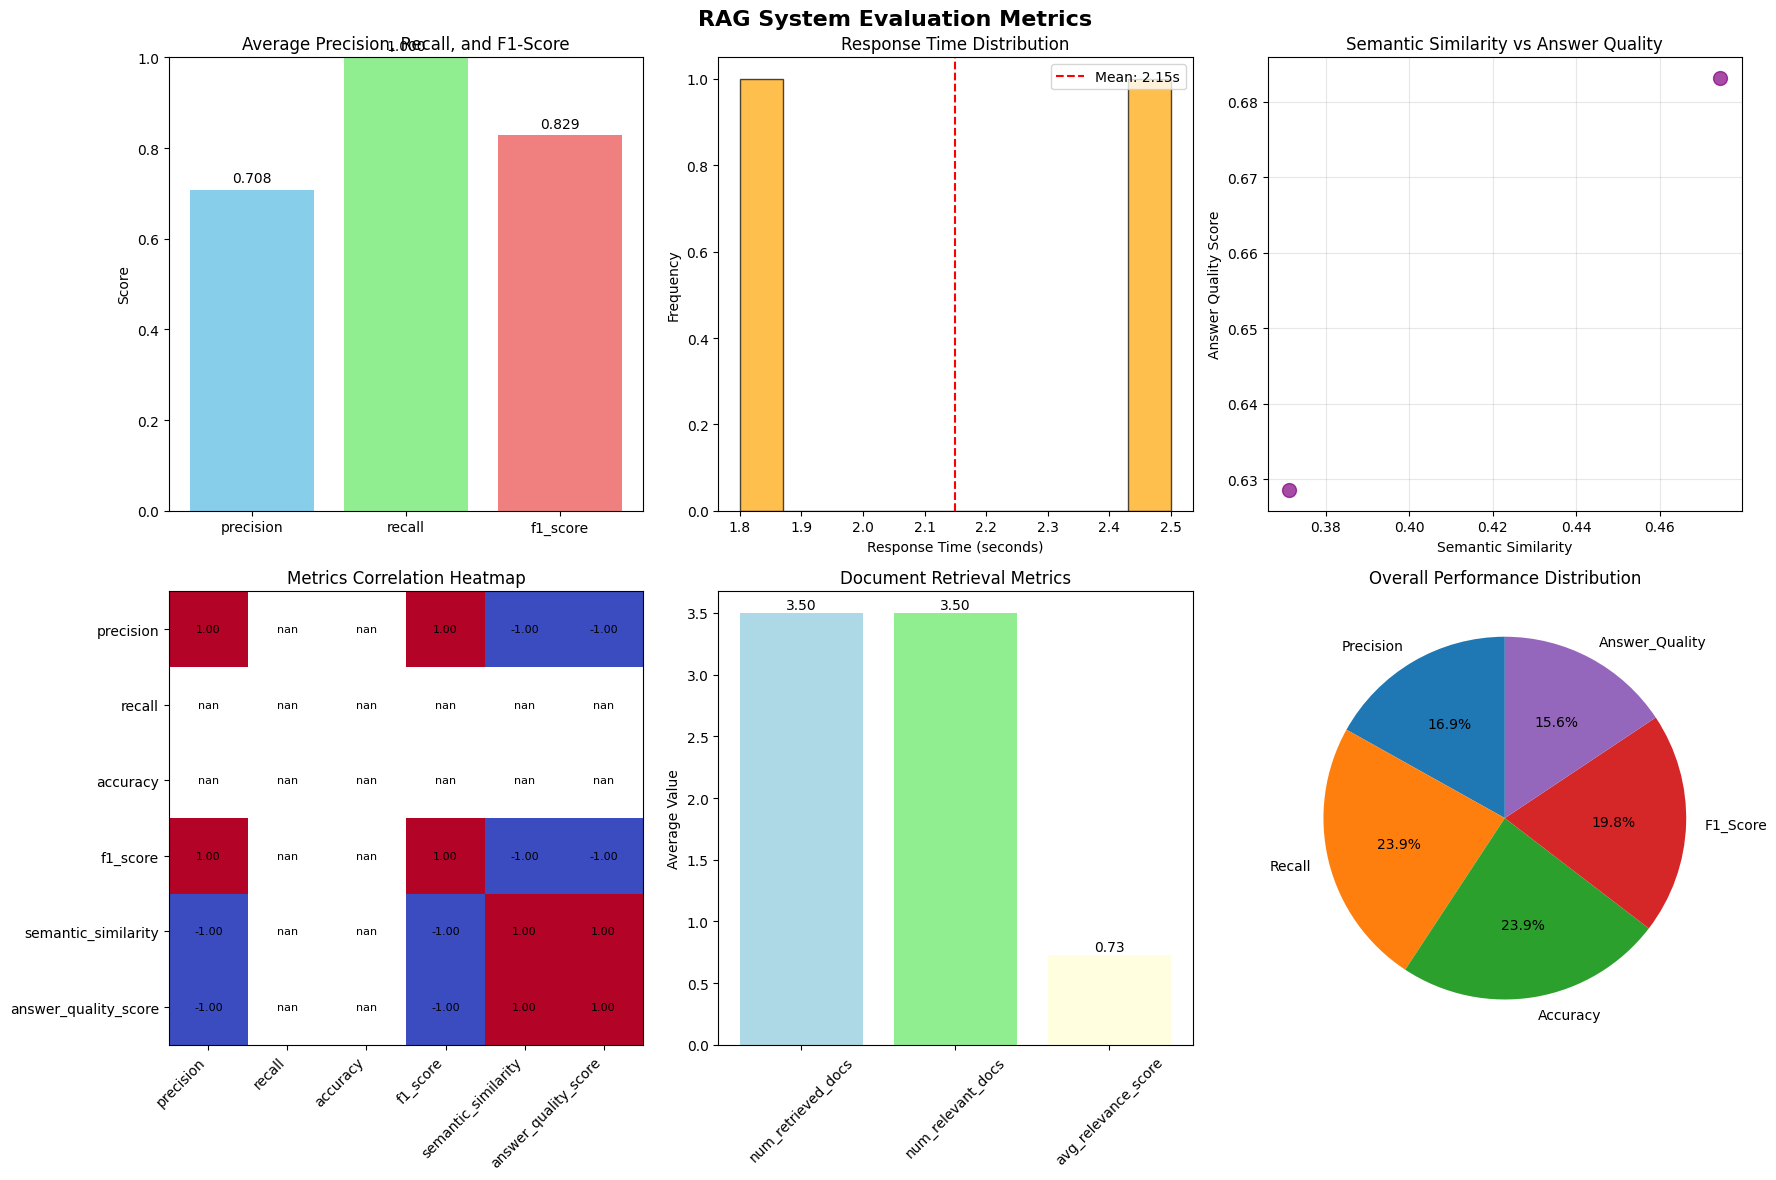

✅ Visualizations created successfully


In [8]:
# Create visualizations for evaluation results
print("📊 Creating evaluation visualizations...")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('RAG System Evaluation Metrics', fontsize=16, fontweight='bold')

# 1. Precision, Recall, F1-Score comparison
metrics_to_plot = ['precision', 'recall', 'f1_score']
values = [results_df[metric].mean() for metric in metrics_to_plot]
bars = axes[0, 0].bar(metrics_to_plot, values, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 0].set_title('Average Precision, Recall, and F1-Score')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_ylim(0, 1)
for bar, value in zip(bars, values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{value:.3f}', ha='center', va='bottom')

# 2. Response time distribution
axes[0, 1].hist(results_df['response_time'], bins=10, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Response Time Distribution')
axes[0, 1].set_xlabel('Response Time (seconds)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(results_df['response_time'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {results_df["response_time"].mean():.2f}s')
axes[0, 1].legend()

# 3. Answer quality scores
axes[0, 2].scatter(results_df['semantic_similarity'], results_df['answer_quality_score'], 
                   alpha=0.7, s=100, color='purple')
axes[0, 2].set_title('Semantic Similarity vs Answer Quality')
axes[0, 2].set_xlabel('Semantic Similarity')
axes[0, 2].set_ylabel('Answer Quality Score')
axes[0, 2].grid(True, alpha=0.3)

# 4. Metrics correlation heatmap
correlation_data = results_df[['precision', 'recall', 'accuracy', 'f1_score', 
                               'semantic_similarity', 'answer_quality_score']].corr()
im = axes[1, 0].imshow(correlation_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 0].set_title('Metrics Correlation Heatmap')
axes[1, 0].set_xticks(range(len(correlation_data.columns)))
axes[1, 0].set_yticks(range(len(correlation_data.columns)))
axes[1, 0].set_xticklabels(correlation_data.columns, rotation=45, ha='right')
axes[1, 0].set_yticklabels(correlation_data.columns)

# Add correlation values to heatmap
for i in range(len(correlation_data.columns)):
    for j in range(len(correlation_data.columns)):
        text = axes[1, 0].text(j, i, f'{correlation_data.iloc[i, j]:.2f}',
                               ha="center", va="center", color="black", fontsize=8)

# 5. Document retrieval metrics
retrieval_metrics = ['num_retrieved_docs', 'num_relevant_docs', 'avg_relevance_score']
retrieval_values = [results_df[metric].mean() for metric in retrieval_metrics]
bars = axes[1, 1].bar(retrieval_metrics, retrieval_values, color=['lightblue', 'lightgreen', 'lightyellow'])
axes[1, 1].set_title('Document Retrieval Metrics')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].tick_params(axis='x', rotation=45)
for bar, value in zip(bars, retrieval_values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{value:.2f}', ha='center', va='bottom')

# 6. Overall performance summary
# --- CORRECTED CODE ---
# Use the 'summary_metrics' dictionary calculated in the previous cell
pie_metric_keys = ['avg_precision', 'avg_recall', 'avg_accuracy', 'avg_f1_score', 'avg_answer_quality']
summary_values = [summary_metrics.get(key, 0) for key in pie_metric_keys]

if any(v > 0 for v in summary_values):
    axes[1, 2].pie(summary_values, labels=[k.replace('avg_', '').title() for k in pie_metric_keys], 
                   autopct='%1.1f%%', startangle=90)
    axes[1, 2].set_title('Overall Performance Distribution')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully")


## Integration with RAG System

This section shows how to integrate the evaluation and telemetry systems with the actual RAG application.


In [6]:
# Example integration code for the RAG system
print("🔗 Integration example for RAG system...")

# This is how you would integrate telemetry into your RAG chain
def create_telemetry_enabled_rag_chain():
    """Example of how to create a RAG chain with telemetry enabled."""
    
    # Import the actual RAG chain
    from rag.chain import create_rag_chain
    
    # Create the base chain
    base_chain = create_rag_chain(
        index_dir=config_manager.data.index_dir,
        use_databricks=config_manager.data.use_databricks
    )
    
    # Wrap with telemetry
    def telemetry_wrapper(query: str, session_id: str, conversation_id: str, turn_id: str, user_id: str = None):
        # Log the query
        telemetry_logger.log_query(
            session_id=session_id,
            conversation_id=conversation_id,
            turn_id=turn_id,
            query=query,
            user_id=user_id
        )
        
        # Measure response time
        start_time = time.time()
        response = base_chain.invoke(query)
        end_time = time.time()
        response_time = end_time - start_time
        
        # Log the response
        telemetry_logger.log_response(
            session_id=session_id,
            conversation_id=conversation_id,
            turn_id=turn_id,
            response=response,
            response_time=response_time,
            user_id=user_id
        )
        
        # Log performance metric
        telemetry_logger.log_performance_metric(
            session_id=session_id,
            conversation_id=conversation_id,
            turn_id=turn_id,
            metric_name="response_time",
            metric_value=response_time,
            user_id=user_id
        )
        
        return response
    
    return telemetry_wrapper

# Example usage
print("📝 Example integration code:")
print("""
# In your app.py or main application:

from evaluation import TelemetryLogger, SessionTracker
from rag.chain import create_rag_chain

# Initialize telemetry
telemetry_logger = TelemetryLogger()
session_tracker = SessionTracker()

# Create RAG chain
rag_chain = create_rag_chain(index_dir, use_databricks)

# In your request handler:
def handle_query(query: str, user_id: str = None):
    # Start session/conversation/turn
    session_id = session_tracker.start_session(user_id)
    conversation_id = session_tracker.start_conversation(session_id)
    turn_id = session_tracker.start_turn(conversation_id)
    
    try:
        # Log query
        telemetry_logger.log_query(session_id, conversation_id, turn_id, query, user_id)
        
        # Get response
        start_time = time.time()
        response = rag_chain.invoke(query)
        response_time = time.time() - start_time
        
        # Log response and metrics
        telemetry_logger.log_response(session_id, conversation_id, turn_id, response, response_time, user_id)
        telemetry_logger.log_performance_metric(session_id, conversation_id, turn_id, "response_time", response_time, user_id)
        
        return response
        
    finally:
        # End turn/conversation/session
        session_tracker.end_turn(turn_id)
        session_tracker.end_conversation(conversation_id)
        session_tracker.end_session(session_id)
""")

print("✅ Integration example provided")


🔗 Integration example for RAG system...
📝 Example integration code:

# In your app.py or main application:

from evaluation import TelemetryLogger, SessionTracker
from rag.chain import create_rag_chain

# Initialize telemetry
telemetry_logger = TelemetryLogger()
session_tracker = SessionTracker()

# Create RAG chain
rag_chain = create_rag_chain(index_dir, use_databricks)

# In your request handler:
def handle_query(query: str, user_id: str = None):
    # Start session/conversation/turn
    session_id = session_tracker.start_session(user_id)
    conversation_id = session_tracker.start_conversation(session_id)
    turn_id = session_tracker.start_turn(conversation_id)
    
    try:
        # Log query
        telemetry_logger.log_query(session_id, conversation_id, turn_id, query, user_id)
        
        # Get response
        start_time = time.time()
        response = rag_chain.invoke(query)
        response_time = time.time() - start_time
        
        # Log response and metrics
  

## Cleanup and Summary


In [7]:
# Cleanup resources
print("🧹 Cleaning up resources...")

# Stop telemetry logger
telemetry_logger.stop()
print("✅ Telemetry logger stopped")

# Close Delta table manager
if config_manager.data.use_databricks:
    delta_manager.close()
    print("✅ Delta table manager closed")

# Summary
print("\n📊 Evaluation and Telemetry Testing Summary:")
print("=" * 50)
print("✅ Evaluation metrics system tested")
print("✅ Telemetry logging system tested")
print("✅ Delta tables created (if Databricks enabled)")
print("✅ User interaction simulation completed")
print("✅ Data visualizations generated")
print("✅ Integration examples provided")

print("\n🎯 Key Features Implemented:")
print("• Precision, Recall, Accuracy, F1-Score calculations")
print("• Semantic similarity and answer quality scoring")
print("• Comprehensive telemetry logging (queries, responses, clicks, scrolls, etc.)")
print("• Session, conversation, and turn tracking")
print("• Delta table schemas for Unity Catalog")
print("• Performance metrics collection")
print("• Data visualization and analysis")

print("\n📋 Next Steps:")
print("1. Integrate telemetry into your RAG application")
print("2. Set up monitoring dashboards using the Delta tables")
print("3. Configure data retention policies")
print("4. Set up alerts for performance degradation")
print("5. Implement A/B testing using the evaluation framework")

print("\n🔗 Integration Points:")
print("• Add telemetry logging to your RAG chain")
print("• Implement session tracking in your web interface")
print("• Set up periodic evaluation runs")
print("• Create monitoring dashboards from Delta table data")


🧹 Cleaning up resources...
✅ Telemetry logger stopped

📊 Evaluation and Telemetry Testing Summary:
✅ Evaluation metrics system tested
✅ Telemetry logging system tested
✅ Delta tables created (if Databricks enabled)
✅ User interaction simulation completed
✅ Data visualizations generated
✅ Integration examples provided

🎯 Key Features Implemented:
• Precision, Recall, Accuracy, F1-Score calculations
• Semantic similarity and answer quality scoring
• Comprehensive telemetry logging (queries, responses, clicks, scrolls, etc.)
• Session, conversation, and turn tracking
• Delta table schemas for Unity Catalog
• Performance metrics collection
• Data visualization and analysis

📋 Next Steps:
1. Integrate telemetry into your RAG application
2. Set up monitoring dashboards using the Delta tables
3. Configure data retention policies
4. Set up alerts for performance degradation
5. Implement A/B testing using the evaluation framework

🔗 Integration Points:
• Add telemetry logging to your RAG chain
